In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv("train.csv")
df=data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
todel=["PassengerId","Name","Ticket","Cabin"]
df=df.drop(todel,axis=1)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)


In [6]:
#labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])

In [7]:
df["Embarked"]=le.fit_transform(df["Embarked"])

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [9]:
pd.get_dummies(df["Sex"])

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [10]:
pd.get_dummies(df["Embarked"])

,0,1,2
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [11]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


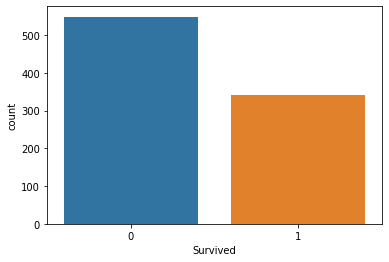

In [13]:
import seaborn as sns
print(sns.countplot(df["Survived"]))

In [14]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier 
re=RandomForestClassifier()
re.fit(x_train,y_train)
pred=re.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.7757847533632287


In [20]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred2=lr.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred2))

0.7937219730941704
